# Decision Tree Classifier

In [41]:
import pandas as pd
import pyodbc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [29]:
DB = {
    'servername': 'tcp:dwhunitedoutdoors.database.windows.net,1433',
    'database': 'DWH_United_Outdoors',
    'username': 'onderzoeker',
    'password': 'Wachtwoord1.' 
}

conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=' + DB['servername'] + ';'
    'DATABASE=' + DB['database'] + ';'
    'UID=' + DB['username'] + ';'
    'PWD=' + DB['password'] + ';'
    'Encrypt=yes;'
    'TrustServerCertificate=no;'
    'Connection Timeout=30;'
)

dwh_conn = pyodbc.connect(conn_str)
dwh_cursor = dwh_conn.cursor()
dwh_cursor 

In [30]:
def read_data_from_DWH(table_name):
    query = f"SELECT * FROM {table_name}"
    return pd.read_sql(query, dwh_conn)

df_Combined_customer = read_data_from_DWH('Combined_Customer')
df_product = read_data_from_DWH('PRODUCT')
df_product.columns

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_14476\1925289317.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, dwh_conn)
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_14476\1925289317.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, dwh_conn)


Index(['PRODUCT_id', 'PRODUCT_name', 'PRODUCT_standard_cost',
       'PRODUCT_list_price', 'PRODUCT_LINE_code', 'PRODUCT_CLASS_code',
       'PRODUCT_STYLE_code', 'Product_MODEL_name', 'Product_CULTURE_name',
       'PRODUCT_SUBCATEGORY_name', 'PRODUCT_CATEGORY_name', 'PRODUCT_color',
       'PRODUCT_modified_date'],
      dtype='object')

In [38]:
label_encoder = LabelEncoder()
categorical_columns = ['PRODUCT_color']  
for col in categorical_columns:
    df_product[col] = label_encoder.fit_transform(df_product[col])


features = ['PRODUCT_standard_cost', 'PRODUCT_list_price', 'PRODUCT_color', '']  
X = df_product[features]
y = label_encoder.fit_transform(df_product['PRODUCT_CATEGORY_name']) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         9

    accuracy                           0.99       101
   macro avg       1.00      0.93      0.96       101
weighted avg       0.99      0.99      0.99       101

Accuracy: 0.9900990099009901


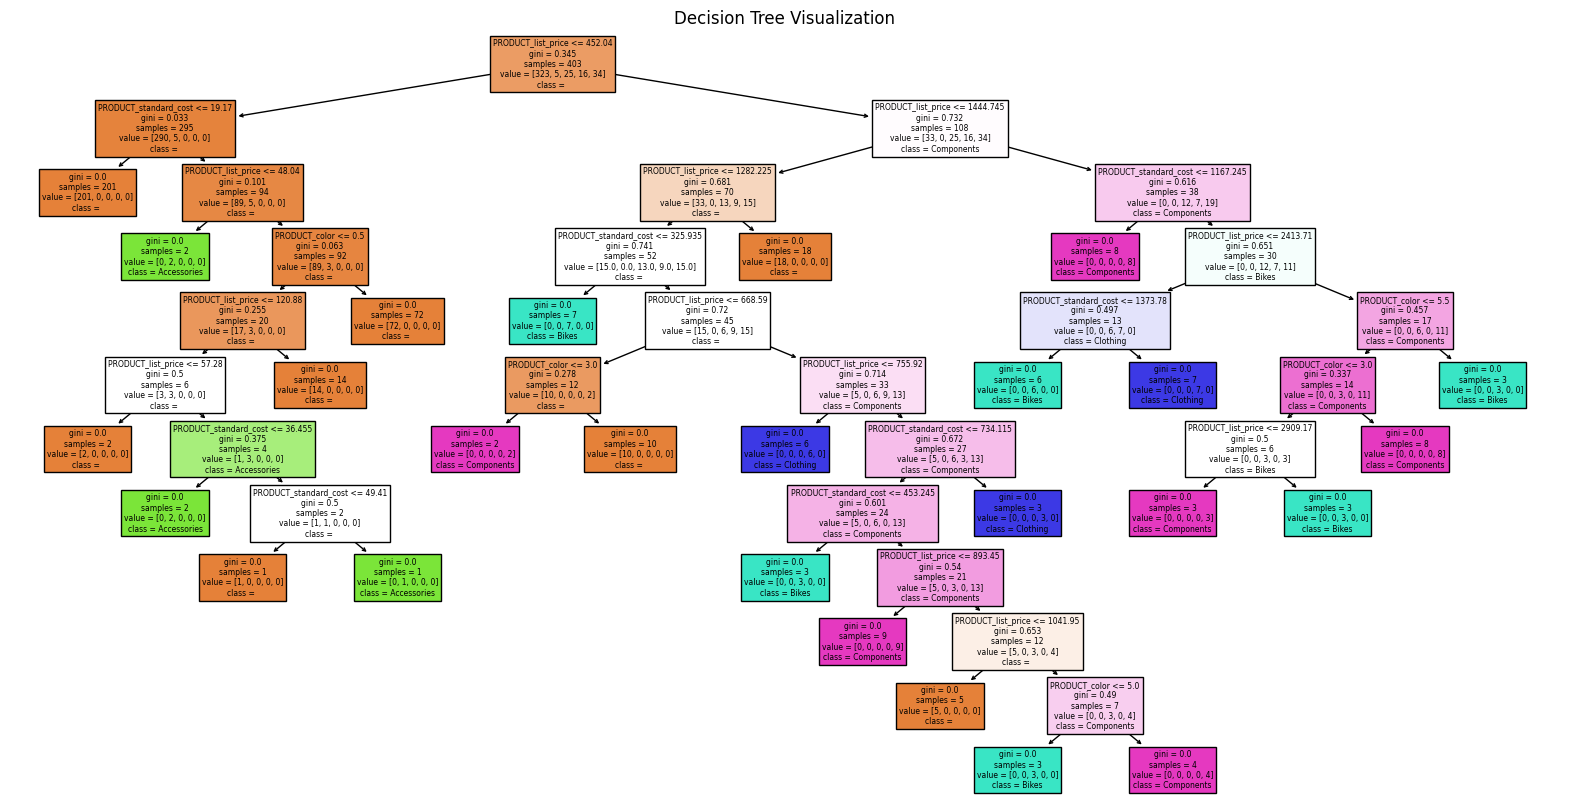

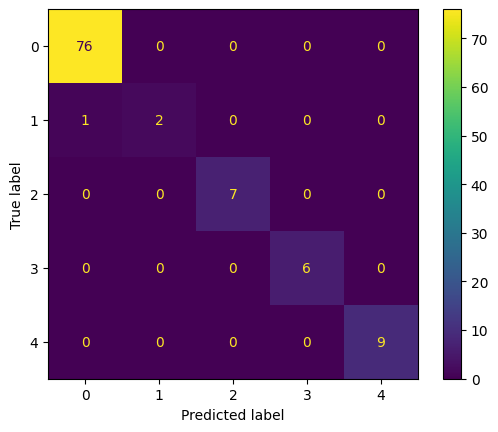

In [43]:
plt.figure(figsize=(20, 10)) 
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=label_encoder.classes_)
plt.title('Decision Tree Visualization')
plt.show()
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
import pandas as pd
import pyodbc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


df_customers = read_data_from_DWH('Customer')
df_orders = read_data_from_DWH('Sales_Order')


df_merged = pd.merge(df_customers, df_orders, left_on='CustomerID', right_on='Cust_ID')


df_merged['order_date'] = pd.to_datetime(df_merged['order_date'])
df_merged['Days_Since_Last_Order'] = (pd.Timestamp('now') - df_merged['order_date']).dt.days

df_merged['Churn'] = (df_merged['Days_Since_Last_Order'] > 365).astype(int)


X = df_merged[['Days_Since_Last_Order']]  
y = df_merged['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Churn Prediction Confusion Matrix')
plt.show()


### Beschrijving

Deze code voert een machine learning pipeline uit waarin een beslissingsboom classifier wordt gebruikt om voorspellingen te doen en de resultaten te evalueren. De data wordt eerst voorbereid door de kenmerken (X) en de doelvariabelen (y) te selecteren uit een dataset genaamd `merged_data`. Vervolgens wordt de data opgesplitst in een trainingsset en een testset, waarbij 80% van de data wordt gebruikt voor training en 20% voor testen. Dit wordt gedaan om ervoor te zorgen dat het model getraind wordt op een deel van de data en de prestaties beoordeeld kunnen worden op een apart deel van de data dat tijdens de training niet is gezien.

Een beslissingsboom classifier wordt aangemaakt met een maximale diepte van 8, om overfitting te voorkomen. Dit model wordt vervolgens getraind op de trainingsdata. Na de training worden voorspellingen gedaan op de testdata, en deze voorspellingen worden vergeleken met de werkelijke waarden om de prestaties van het model te evalueren. De nauwkeurigheid van de voorspellingen wordt berekend, evenals de mean squared error, die de gemiddelde kwadratische fout tussen de voorspelde en werkelijke waarden meet.

Daarnaast wordt de beslissingsboom gevisualiseerd om de structuur en de beslissingen van het model inzichtelijk te maken. Deze visualisatie helpt bij het begrijpen van de logica die het model gebruikt om tot zijn voorspellingen te komen, wat nuttig kan zijn voor interpretatie en communicatie met belanghebbenden.

De resultaten van de voorspellingen worden verzameld in een DataFrame waarin de werkelijke en voorspelde waarden naast elkaar worden geplaatst, waardoor het gemakkelijk is om de prestaties van het model te analyseren en eventuele fouten te identificeren. Verder wordt er een confusiematrix aangemaakt en gevisualiseerd om gedetailleerd te kunnen zien hoeveel voorspellingen correct of incorrect waren. Deze matrix toont het aantal juiste en foute classificaties per klasse, wat helpt bij het identificeren van specifieke problemen in de voorspellingen van het model.

In samenvatting combineert deze pipeline data voorbereiding, modeltraining, voorspelling, evaluatie en visualisatie om een compleet overzicht te geven van de prestaties en het gedrag van een machine learning model, specifiek een beslissingsboom classifier, in een gestructureerd en reproduceerbaar proces.

#### Belang van dit model

De keuze voor een beslissingsboom classifier is geschikt voor het project van United Outdoors vanwege de veelzijdigheid en begrijpelijkheid van dit model. Beslissingsbomen zijn krachtige tools voor zowel classificatie- als regressietaken, wat ze ideaal maakt voor het brede scala aan data-analyses die nodig zijn na de fusie van AenC, AdventureWorks, en Northwind.

In de context van deze fusie, waar de integratie van grote en diverse datasets van belang is, biedt de beslissingsboom classifier verschillende voordelen:

    Eenvoud en Interpretatie: Beslissingsbomen zijn gemakkelijk te visualiseren en te interpreteren. Dit is bijzonder waardevol voor de data-analisten van United Outdoors, die sterk zijn in het bekijken van data, maar misschien niet technisch begaafd zijn. De boomstructuur maakt het eenvoudig om de beslissingslogica uit te leggen aan belanghebbenden en de resultaten te communiceren.

    Flexibiliteit: De beslissingsboom kan omgaan met zowel numerieke als categorische data, wat perfect past bij de diverse datasets van de drie gefuseerde organisaties (kleding, fietsen, en voedsel). Dit model kan bijvoorbeeld voorspellingen doen over verkoopverwachtingen, klantgedrag, en voorraadbeheer op basis van verschillende variabelen.

    Snelle Beslissingen: Gezien de competitieve druk om snel maar accuraat beslissingen te nemen, biedt een beslissingsboom classifier snelle modeltraining en voorspellingen. Dit helpt United Outdoors om tijdig strategische beslissingen te nemen en concurrenten zoals Great Outdoors voor te blijven.

    Hyperparameter Tuning: De maximale diepte van de boom (in dit geval ingesteld op 8) kan worden aangepast om overfitting te voorkomen en de modelprestaties te optimaliseren. Dit proces van iteratieve optimalisatie is essentieel om het model robuust en nauwkeurig te maken, wat direct bijdraagt aan de kwaliteit van de voorspellingen.

    Schaalbaarheid: Beslissingsbomen kunnen efficiënt schalen met de hoeveelheid data, wat belangrijk is voor een fusiebedrijf dat continue datagroei verwacht. De schaalbaarheid helpt ook bij het toevoegen van nieuwe databronnen aan het Data Warehouse zonder dat de modelprestaties significant afnemen.
